```

| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  열차 하나 
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
                            .
                            .
                            .
                            .
                            .
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  열차 백 

```

전체 구간에 대해 유전 알고리즘을 적용시킴니다.

In [83]:
# import 및 변수정의 구간
import random
import math
import re
import operator 
from random import randint

# 리스트 크기
listN = 8

# 염색체 해집단 수
N = 30

# 역 구간
Station_section = 11

# 하루에 운행하는 열차 수
One_day_train = 8

#교차율
Pc = 0.7

#변이율 역수 관계
Pm = 100

#마지막 세대수 
largest_generation = 5

#보존할 상위값
save_value = 5

choice_list = [i+1 for i in range(listN-1)]


In [84]:
#초기값
speedlist = [[[[random.choice([0,1]) for i in range(listN)]for j in range(Station_section)]for k in range(One_day_train)]for z in range(N)]


In [85]:
# 01010로 이루어진 리스트를 10진수로 디코딩하는 함수

def decoding(X, Y=0):
    """
    input   : 0100로 이루어진 리스트
    return : 10진수 정수
    """
    for i, x in enumerate(X[1:]):
        Y += x* math.pow(2, listN -i -2)
    #10나누고 소스점 1자리 표시하는데 왜 
    #Y = round(Y/10, 1) 
    
    #처음 값이 0이면 음수로 return
    if X[0] == 0: return -Y
    return Y

In [86]:
decoding([0,1,1,0,0,1,1,1])

-103.0

In [87]:
#파일을 2차원 배열로 바꿔주기

def Readtxt(fname):
    """
    input  : 파일들
    return : 2차원 배열 
    """
    w = []
    with open(fname, 'r') as f :
        for line in f: #for each line in the file,
            w.append(line.split('\t'))
    return w

In [88]:
# 바뀌야됨
#def ScoreFunction(X, 구간,):
#                           몇번째 열차인지
def ScoreFunction(X,num_of_Train):
    """
    X에 속도 리스트를 넣어서 평가
    """
    #구간별 점수 (11개죠)
    sp = []
    for x in (X):
        sp.append(decoding(x))
        
    test = 0
    for i, _ in enumerate(sp):
        sp[i] = (777 - (6 * sp[i])) * 8
    
    return sp

In [89]:
test_X = ScoreFunction(speedlist[1][1],1)
test_X[1]

6936.0

In [90]:
print(len(speedlist), len(speedlist[0]), len(speedlist[0][0]),len(speedlist[0][0][0]))

30 8 11 8


In [91]:
#하루 열차의 총합 구하기
def Make_Score_per_all(speedlist):
    #열차마다 점수                             #30개의 경쟁 100개의 열차
    Score_per_train = [[0 for i in range(One_day_train)]for j in range(N)]

    # 30개의 경쟁
    for k in range(N):
        # 100대의 열차
        for i in range(One_day_train):
            # 11개의 역
            one_tranin = ScoreFunction(speedlist[k][i], k)
            for j in range(Station_section):
                #각 열차에 대해      += 11개의 구간의 점수 합                   ([30경쟁][100대열차] +=  [30경쟁][100대열차][11개의 역])
                Score_per_train[k][i] += one_tranin[j]


    # 하루마다의 점수 
    Score_per_all = [0 for i in range(N)]

    # 30개의 경쟁            
    for i in range(N):
        # 100대의 열차
        for j in range(One_day_train):
             Score_per_all[i] += Score_per_train[i][j]
                
    return Score_per_all

In [92]:
Score_per_all = Make_Score_per_all(speedlist)
Score_per_all

[522000.0,
 551088.0,
 522624.0,
 510384.0,
 515568.0,
 523968.0,
 542496.0,
 610608.0,
 542592.0,
 603696.0,
 531120.0,
 584688.0,
 568848.0,
 523392.0,
 600432.0,
 553632.0,
 538560.0,
 590256.0,
 562224.0,
 555792.0,
 592896.0,
 540624.0,
 562032.0,
 534288.0,
 531936.0,
 505152.0,
 554688.0,
 535632.0,
 537264.0,
 567120.0]

In [93]:
print(len(speedlist), len(speedlist[0]), len(speedlist[0][0]), len(speedlist[0][0][0]),"총개수 : " ,len(speedlist) * len(speedlist[0]) * len(speedlist[0][0]) * len(speedlist[0][0][0])
)


30 8 11 8 총개수 :  21120


In [94]:
def Score_assessment_group(Score_per_all):
    # 적합도 비율 찾기
    speedlist_evaluation = [[Score_per_all[i], 0, i] for i in range(N)]

    Sum_of_fitness = 0
    for i in range(N): 
        Sum_of_fitness += Score_per_all[i]
    for i in range(N):
        if i == 0:
            speedlist_evaluation[i][1] = speedlist_evaluation[i][0]/Sum_of_fitness
        else:
            speedlist_evaluation[i][1] = speedlist_evaluation[i-1][1]  + speedlist_evaluation[i][0]/Sum_of_fitness
    
    return speedlist_evaluation


In [95]:
def roulettes(Group_assessment_value):
    roulette = random.random()
    for i in range(N):
        if i == 0:
            if 0 < roulette < Group_assessment_value[i][1]:
                break
        if Group_assessment_value[i-1][1] < roulette < Group_assessment_value[i][1]:
            break
    return i

In [96]:
#부모 변경
def Change_parent(speedlist, Selected_list_in_roulette):
    W = [[[0 for j in range(Station_section)]for k in range(One_day_train)]for z in range(N)]
    # 교차함수 및 변이함수 (자식만들기)
    for i in range(int(N/2)):
        for j in range(One_day_train):
            for k in range(Station_section):
                #교차
                selection = random.random()
                ###############################################################
                if selection < Pc:
                    rand = random.choice(choice_list) # 0~ 이구간, 이구간 ~ 끝 교차 , 이구간 = 1~리스트 크기 -1 
                    # W(교차된 자식) = Selected_list_in_roulette(선택된 리스트에서) rand구간으로 나눈 값
                    W[i*2][j][k]     = speedlist[Selected_list_in_roulette[i*2]][j][k][0:rand]         + speedlist[Selected_list_in_roulette[i*2+1]][j][k][rand:]
                    W[i*2+1][j][k] = speedlist[Selected_list_in_roulette[i*2+1]][j][k][0:rand] + speedlist[Selected_list_in_roulette[i*2]][j][k][rand:]
                else:
                    W[i*2][j][k]     = speedlist[Selected_list_in_roulette[i*2]][j][k]
                    W[i*2+1][j][k] = speedlist[Selected_list_in_roulette[i*2+1]][j][k]
                #변의
                for z in range(2):
                    # Pm * 100 분의 1의 확률 
                    if randint(0, 100 * Pm) == 0:
                        #selection 부분을 변의 1 -> 0  0 -> 1
                        if W[i*2+z][j][k][rand] == 0:
                            W[i*2+z][j][k][rand] = 1
                        else:
                            W[i*2+z][j][k][rand] = 0
    return W

In [97]:
#세대 반복
def Evolution(speedlist, num_generation):
    All_New_Score_per_all = []
    while 1: 
        if num_generation >= largest_generation:
            break

        #전체 값으로 해서 
        Score_per_all = Make_Score_per_all(speedlist)

        #평가한 값 
        Group_assessment_value = Score_assessment_group(Score_per_all)

        #                                         정렬   점수값이 높은 순으로
        sortand_Group_assessmend = sorted(Group_assessment_value, key=operator.itemgetter(0),reverse=True)
        #상위 save_value 개값        
        save_assessmend_value = sortand_Group_assessmend[0:save_value]
        # Score_per_all에서 몇번 배열이 상위 5개인지만 
        # 리스트 해쉬값만
        save_assessmend_num = [save_assessmend_value[i][2] for i in range(save_value)]


        Selected_list_in_roulette = []

        #룰렛에 선택된 리스트들 마지막 5개는 상위5개만 
        for i in range(N-5):
            Selected_list_in_roulette.append(roulettes(Group_assessment_value))

        Selected_list_in_roulette += save_assessmend_num
        
        #룰렛 랜덤하게  근데이거하면 오류남 왜지?
        #Selected_list_in_roulette = random.shuffle(Selected_list_in_roulette)
        # ------------------------------------------------------------------------------------------------------------------------------------------------------------
        
        New_list = Change_parent(speedlist, Selected_list_in_roulette)
        
        New_Score_per_all = Make_Score_per_all(New_list)
        
        print("-" * 15)    
        print(num_generation,"번째를 합니다.")
        print("-" * 15)
        for i, nl in enumerate(New_Score_per_all):
            print(i, nl)
        All_New_Score_per_all.append(New_Score_per_all)
        speedlist = New_list
        num_generation += 1

    return New_list, All_New_Score_per_all

In [98]:
test_list = []
plt_score_per =[]
test_list,plt_score  = Evolution(speedlist, 0)

---------------
0 번째를 합니다.
---------------
0 527472.0
1 548256.0
2 548064.0
3 515856.0
4 580752.0
5 550896.0
6 543072.0
7 576912.0
8 507312.0
9 601296.0
10 565440.0
11 597744.0
12 539424.0
13 582336.0
14 584688.0
15 584688.0
16 604512.0
17 528624.0
18 574128.0
19 555888.0
20 577344.0
21 564096.0
22 573888.0
23 518208.0
24 610608.0
25 610608.0
26 601104.0
27 592848.0
28 599856.0
29 586848.0
---------------
1 번째를 합니다.
---------------
0 505920.0
1 575424.0
2 513216.0
3 514560.0
4 550752.0
5 581712.0
6 580512.0
7 523968.0
8 584688.0
9 584688.0
10 556704.0
11 620496.0
12 553968.0
13 567360.0
14 598752.0
15 590880.0
16 526608.0
17 606480.0
18 607008.0
19 597984.0
20 564432.0
21 559968.0
22 525984.0
23 611040.0
24 572784.0
25 599232.0
26 609696.0
27 593232.0
28 599376.0
29 603024.0
---------------
2 번째를 합니다.
---------------
0 582576.0
1 593328.0
2 518544.0
3 592128.0
4 592464.0
5 567264.0
6 557328.0
7 521904.0
8 563040.0
9 603408.0
10 588384.0
11 608736.0
12 556080.0
13 615840.0
14 561936.0
1

In [99]:
test_list

[[[[0, 1, 1, 1, 1, 0, 1, 0],
   [0, 0, 1, 1, 0, 0, 1, 0],
   [1, 1, 1, 1, 1, 0, 1, 1],
   [1, 0, 1, 0, 0, 0, 0, 0],
   [1, 0, 0, 1, 1, 1, 1, 1],
   [0, 1, 1, 0, 0, 0, 1, 0],
   [1, 0, 1, 1, 1, 1, 0, 1],
   [1, 0, 0, 0, 0, 1, 1, 0],
   [0, 0, 0, 1, 0, 0, 0, 1],
   [0, 1, 1, 0, 1, 1, 1, 0],
   [0, 0, 1, 1, 1, 0, 0, 0]],
  [[1, 0, 0, 0, 1, 1, 0, 1],
   [0, 1, 0, 0, 1, 1, 1, 1],
   [1, 0, 1, 1, 1, 1, 0, 1],
   [1, 1, 0, 1, 0, 1, 1, 0],
   [0, 1, 0, 1, 0, 1, 1, 0],
   [0, 1, 1, 1, 1, 0, 1, 0],
   [0, 0, 0, 0, 1, 0, 1, 0],
   [0, 0, 0, 0, 1, 1, 1, 0],
   [0, 1, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 0]],
  [[1, 0, 1, 1, 0, 0, 1, 0],
   [0, 0, 0, 0, 1, 0, 1, 1],
   [0, 0, 0, 1, 0, 1, 0, 0],
   [0, 0, 1, 0, 0, 1, 1, 1],
   [1, 0, 0, 1, 0, 0, 1, 1],
   [0, 0, 1, 1, 0, 1, 1, 1],
   [0, 0, 1, 1, 1, 0, 0, 1],
   [1, 0, 0, 1, 1, 0, 0, 1],
   [1, 0, 0, 1, 1, 0, 0, 0],
   [0, 1, 0, 0, 1, 0, 0, 0],
   [0, 1, 0, 0, 0, 1, 0, 0]],
  [[1, 0, 1, 1, 0, 0, 1, 1],
   [0, 1, 0

In [100]:
plt_score

[[527472.0,
  548256.0,
  548064.0,
  515856.0,
  580752.0,
  550896.0,
  543072.0,
  576912.0,
  507312.0,
  601296.0,
  565440.0,
  597744.0,
  539424.0,
  582336.0,
  584688.0,
  584688.0,
  604512.0,
  528624.0,
  574128.0,
  555888.0,
  577344.0,
  564096.0,
  573888.0,
  518208.0,
  610608.0,
  610608.0,
  601104.0,
  592848.0,
  599856.0,
  586848.0],
 [505920.0,
  575424.0,
  513216.0,
  514560.0,
  550752.0,
  581712.0,
  580512.0,
  523968.0,
  584688.0,
  584688.0,
  556704.0,
  620496.0,
  553968.0,
  567360.0,
  598752.0,
  590880.0,
  526608.0,
  606480.0,
  607008.0,
  597984.0,
  564432.0,
  559968.0,
  525984.0,
  611040.0,
  572784.0,
  599232.0,
  609696.0,
  593232.0,
  599376.0,
  603024.0],
 [582576.0,
  593328.0,
  518544.0,
  592128.0,
  592464.0,
  567264.0,
  557328.0,
  521904.0,
  563040.0,
  603408.0,
  588384.0,
  608736.0,
  556080.0,
  615840.0,
  561936.0,
  584832.0,
  603024.0,
  603024.0,
  562800.0,
  605616.0,
  556896.0,
  549600.0,
  605520.0,
  

[610608.0, 620496.0, 616800.0, 626976.0, 632112.0]
[568425.6, 572681.6, 580326.4, 584371.2, 596126.4]


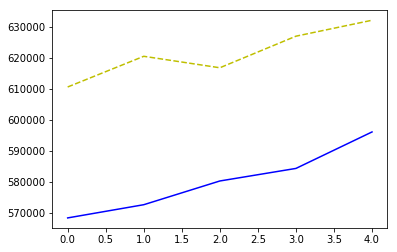

In [103]:
import matplotlib.pyplot as plt




plt_score_max =  [max(plt_score[i]) for i in range(len(plt_score))]
plt_score_avg  =  [sum(plt_score[i])/len(plt_score[i]) for i in range(len(plt_score))]
print(plt_score_max)
print(plt_score_avg)

plt.plot(plt_score_max, 'y--')
plt.plot(plt_score_avg,'b')

plt.show()


In [102]:
Www = [[[0 for i in range(2)]for j in range(2)]for k in range(2)]
    # 교차함수 및 변이함수 (자식만들기)
    
print(Www)
for i in range(2):
    for j in range(2):
        for k in range(2):
            Www[i][j][k] = [43,43,0,2,2]
            
Www

[[[0, 0], [0, 0]], [[0, 0], [0, 0]]]


[[[[43, 43, 0, 2, 2], [43, 43, 0, 2, 2]],
  [[43, 43, 0, 2, 2], [43, 43, 0, 2, 2]]],
 [[[43, 43, 0, 2, 2], [43, 43, 0, 2, 2]],
  [[43, 43, 0, 2, 2], [43, 43, 0, 2, 2]]]]